In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"C:/Term 3/Supervised learning with python/Projects/lending_club/lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                            roc_auc_score, roc_curve, auc)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier


In [10]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [11]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [17]:
loan_status_value_counts = df['loan_status'].value_counts()

<BarContainer object of 2 artists>

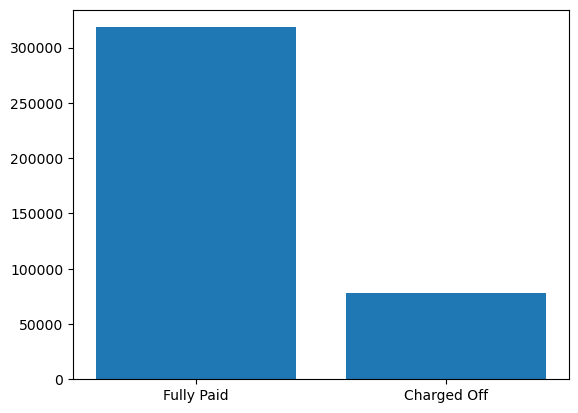

In [18]:
plt.bar(loan_status_value_counts.index, loan_status_value_counts.values)

In [27]:
data = df[['loan_amnt','int_rate', 'installment', 'annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']]

<Axes: >

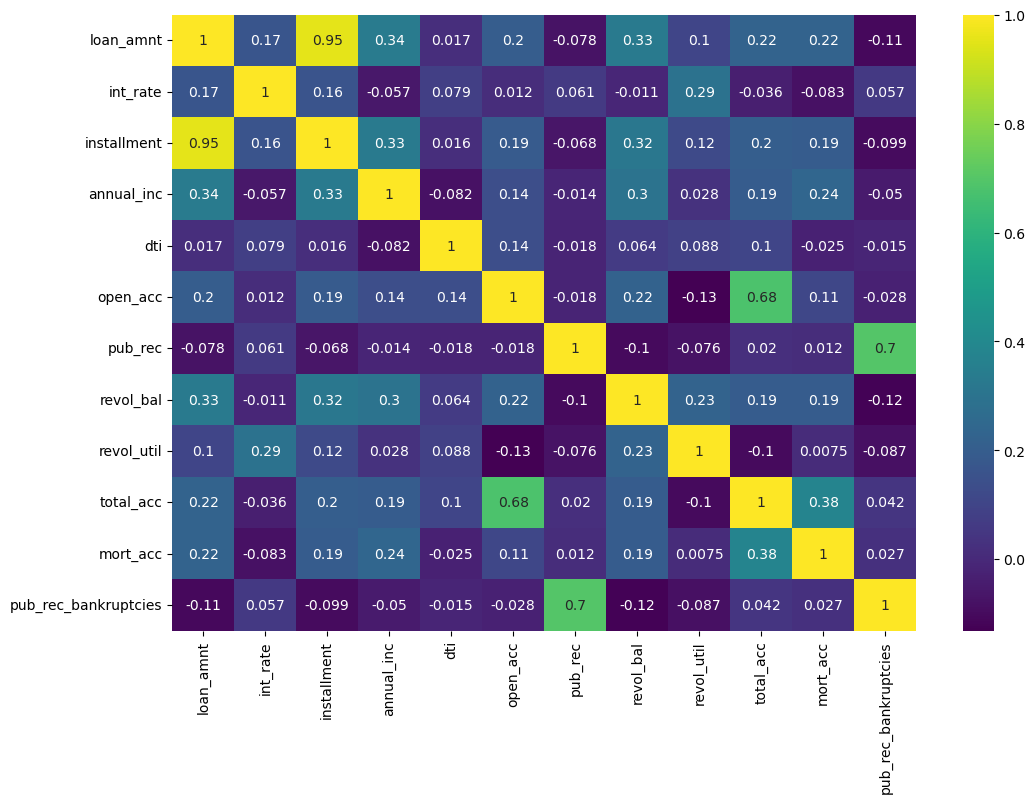

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

<Axes: xlabel='loan_amnt', ylabel='Count'>

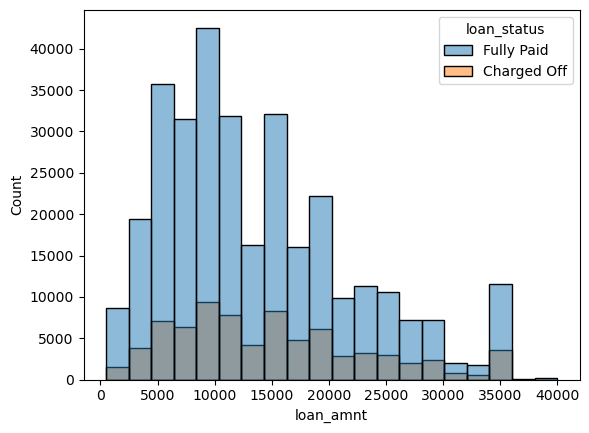

In [32]:
sns.histplot(data =df, x='loan_amnt', hue = 'loan_status', bins = 20)


<Axes: xlabel='installment', ylabel='Count'>

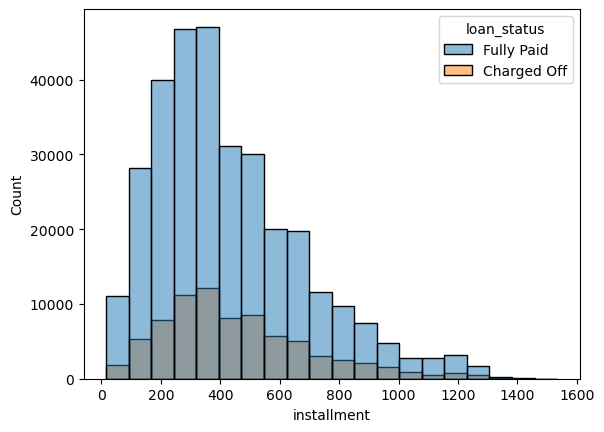

In [33]:
sns.histplot(data =df, x='installment', hue = 'loan_status', bins = 20)


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

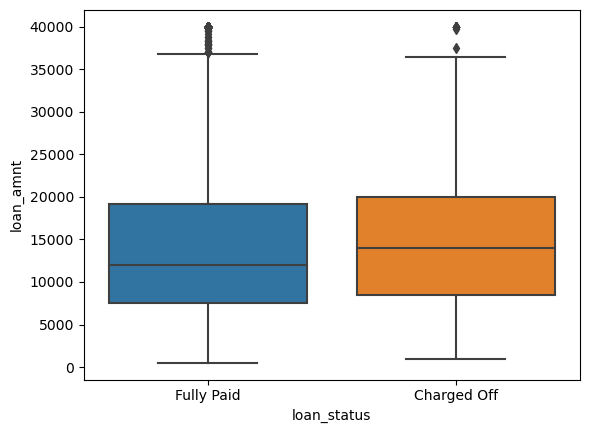

In [36]:
sns.boxplot(data = df ,y = 'loan_amnt',x='loan_status')

<Axes: xlabel='loan_status', ylabel='installment'>

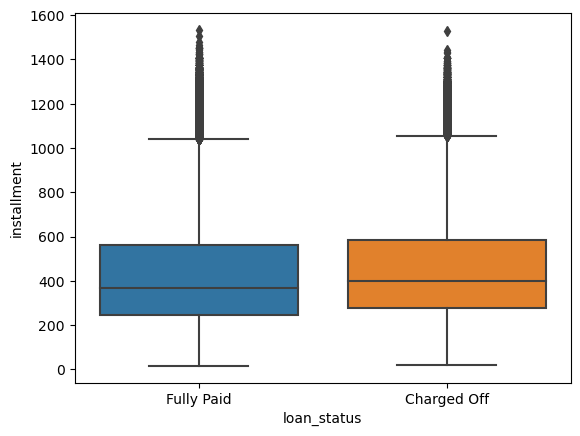

In [39]:
sns.boxplot(data = df ,y = 'installment',x='loan_status')

In [42]:
df.groupby(by = 'loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [44]:
print(f"GRADE UNIQUE: {df.grade.unique()}")
print(f"SUBGRADE UNIQUE: {df.sub_grade.unique()}")

GRADE UNIQUE: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUBGRADE UNIQUE: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [58]:
grades = df.grade.value_counts().index
fullyPaidValueCounts = df[df['loan_status']=="Fully Paid"]['grade'].value_counts().values
chargedOffValueCounts = df[df['loan_status']=="Charged Off"]['grade'].value_counts().values

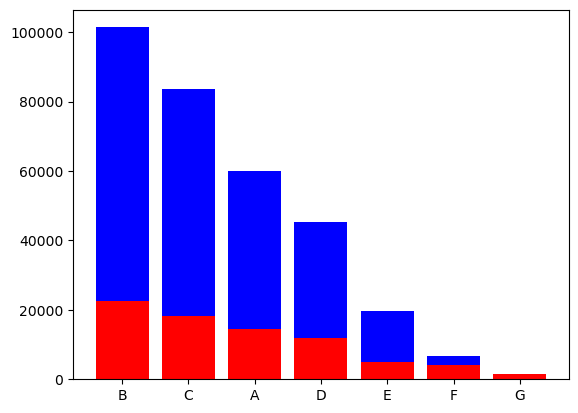

In [60]:
plt.bar(grades,fullyPaidValueCounts,color = "blue",label = "Fully paid")
plt.bar(grades,chargedOffValueCounts,color = "red",label = "Charged off")
plt.show()

In [65]:
subgrades = df.sub_grade.value_counts().index
subfullyPaidValueCounts = df[df['loan_status']=="Fully Paid"]['sub_grade'].value_counts().values
subchargedOffValueCounts = df[df['loan_status']=="Charged Off"]['sub_grade'].value_counts().values

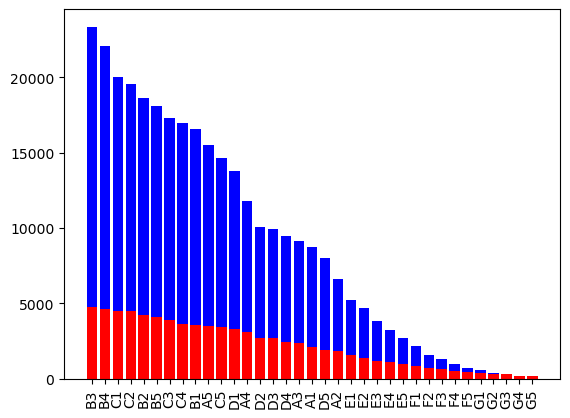

In [68]:
plt.bar(subgrades,subfullyPaidValueCounts,color = "blue",label = "Fully paid")
plt.bar(subgrades,subchargedOffValueCounts,color = "red",label = "Charged off")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='grade', ylabel='count'>

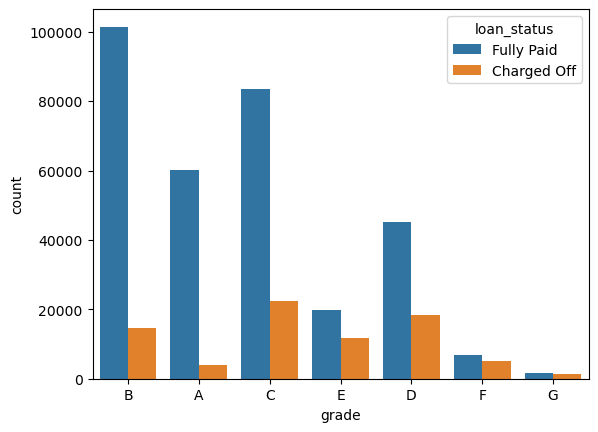

In [69]:
sns.countplot(data=df,x = "grade",hue = "loan_status")

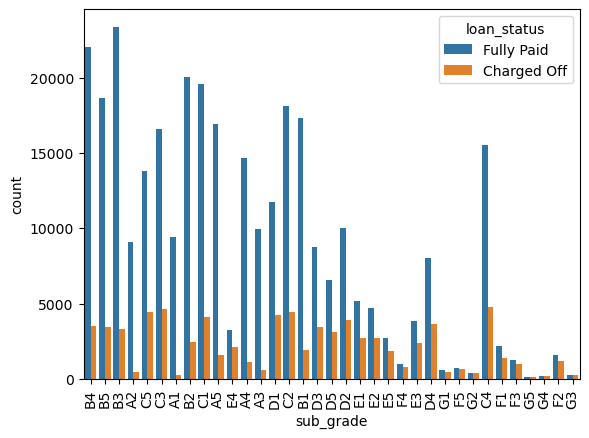

In [72]:
sns.countplot(data=df,x = "sub_grade",hue = "loan_status")
plt.xticks(rotation = 90)
plt.show()

In [73]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

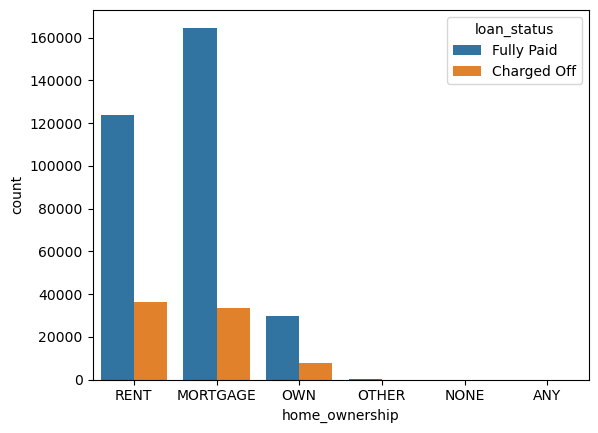

In [74]:
sns.countplot(data = df,x = "home_ownership",hue = "loan_status")

<Axes: xlabel='term', ylabel='count'>

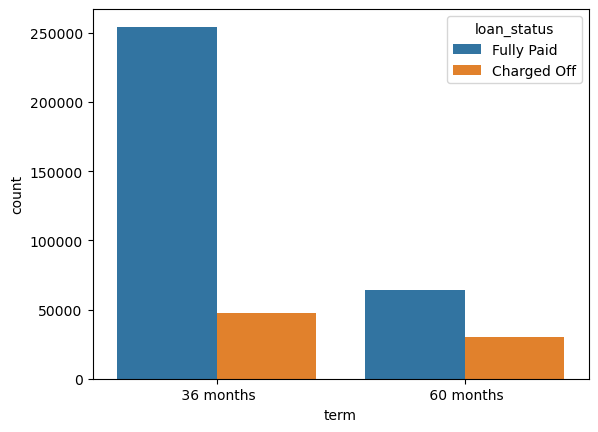

In [80]:
sns.countplot(data =df,x="term",hue = "loan_status")

<Axes: xlabel='verification_status', ylabel='count'>

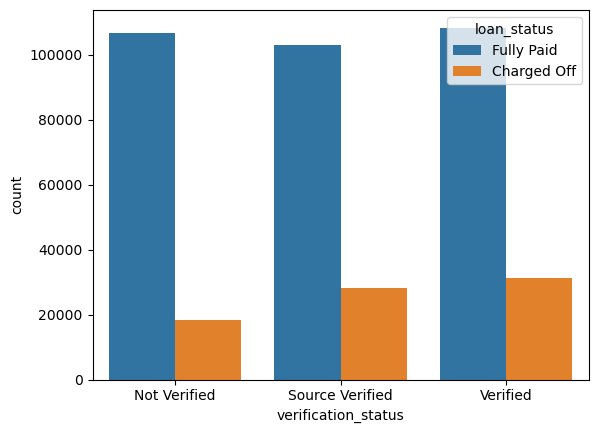

In [82]:
sns.countplot(data =df,x="verification_status",hue = "loan_status")

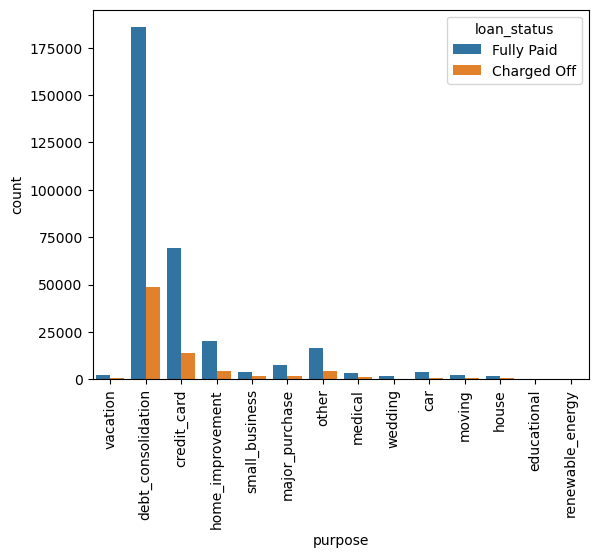

In [86]:
g = sns.countplot(x="purpose",data = df, hue = 'loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<Axes: xlabel='int_rate', ylabel='Count'>

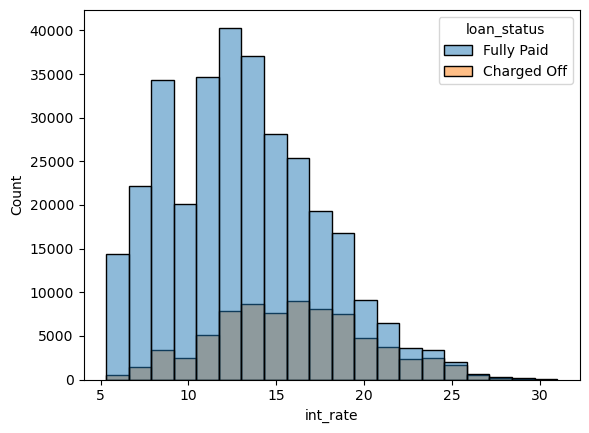

In [87]:
sns.histplot(data =df, x='int_rate', hue = 'loan_status', bins = 20)


<Axes: xlabel='annual_inc', ylabel='Count'>

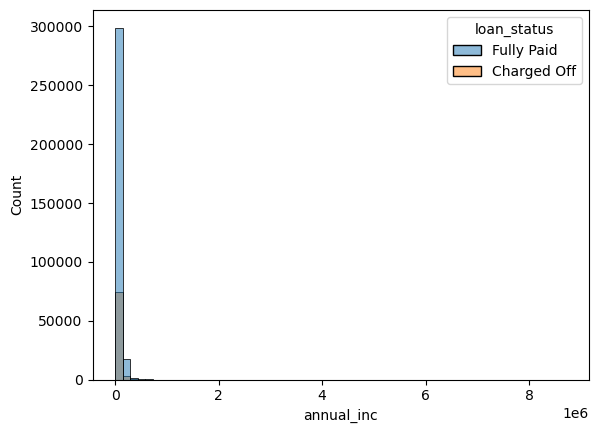

In [89]:
sns.histplot(data =df, x='annual_inc', hue = 'loan_status', bins = 60)


In [90]:
df['emp_title'].value_counts()[:20]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64

[Text(0, 0, '10+ years'),
 Text(1, 0, '4 years'),
 Text(2, 0, '< 1 year'),
 Text(3, 0, '6 years'),
 Text(4, 0, '9 years'),
 Text(5, 0, '2 years'),
 Text(6, 0, '3 years'),
 Text(7, 0, '8 years'),
 Text(8, 0, '7 years'),
 Text(9, 0, '5 years'),
 Text(10, 0, '1 year')]

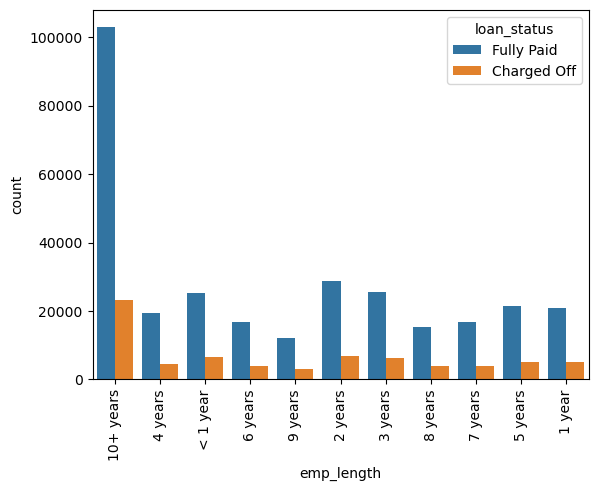

In [94]:
g = sns.countplot(x='emp_length',data = df, hue = 'loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

<BarContainer object of 30 artists>

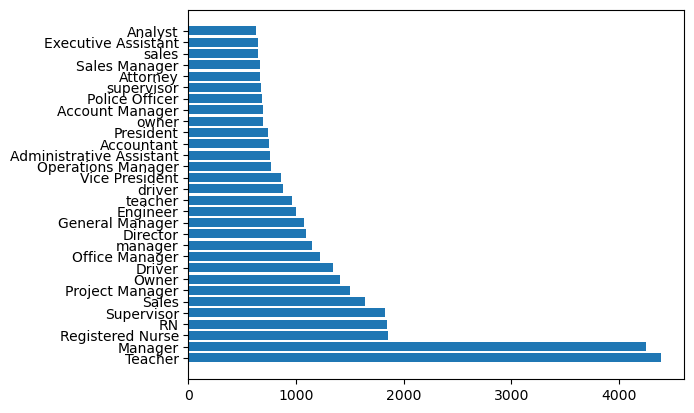

In [98]:
plt.barh(df.emp_title.value_counts()[:30].index,df.emp_title.value_counts().values[:30])

In [100]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [102]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

C:\Users\sarth\AppData\Local\Temp\ipykernel_27444\3329974766.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])
C:\Users\sarth\AppData\Local\Temp\ipykernel_27444\3329974766.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


<Axes: xlabel='issue_d', ylabel='Count'>

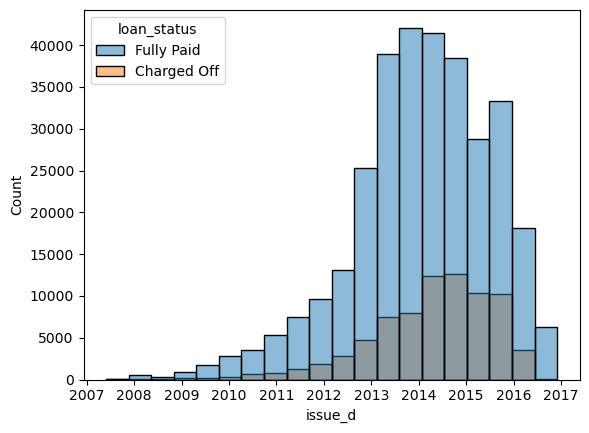

In [104]:
sns.histplot(data=df, x = 'issue_d',hue = 'loan_status',bins=20)

<Axes: xlabel='earliest_cr_line', ylabel='Count'>

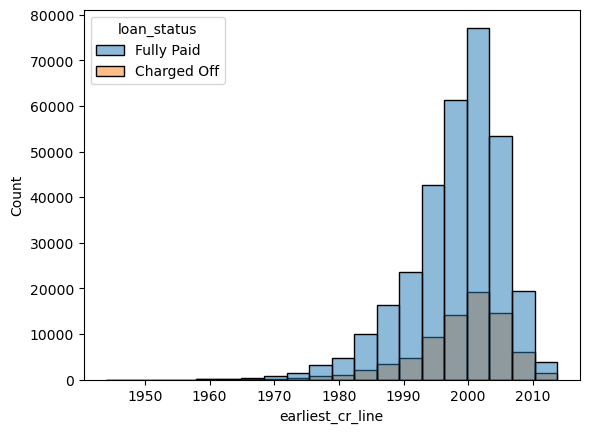

In [105]:
sns.histplot(data=df, x = 'earliest_cr_line',hue = 'loan_status',bins=20)

In [108]:
df.dti.max()
df[df['dti']<30]['loan_status'].value_counts()

loan_status
Fully Paid     299217
Charged Off     68478
Name: count, dtype: int64

<Axes: xlabel='dti', ylabel='Count'>

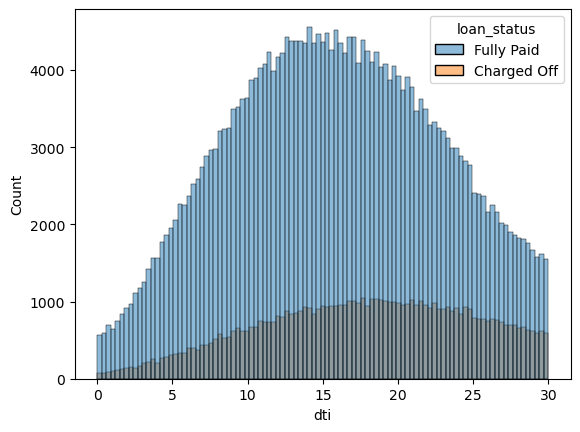

In [109]:
sns.histplot(data = df[df['dti']<30],hue = 'loan_status',x = 'dti')

<Axes: xlabel='open_acc', ylabel='Count'>

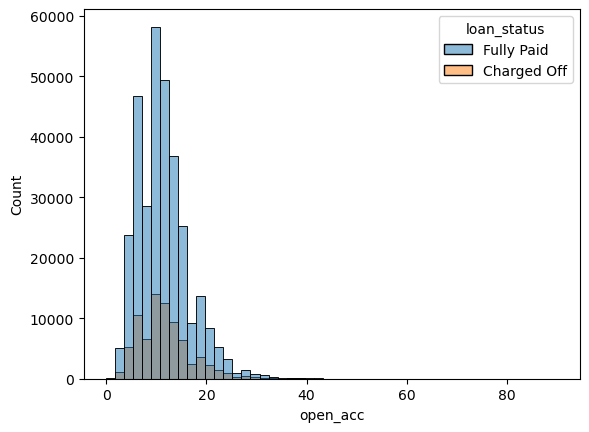

In [111]:
sns.histplot(data = df,hue = 'loan_status',x = 'open_acc',bins=50)

<Axes: xlabel='total_acc', ylabel='Count'>

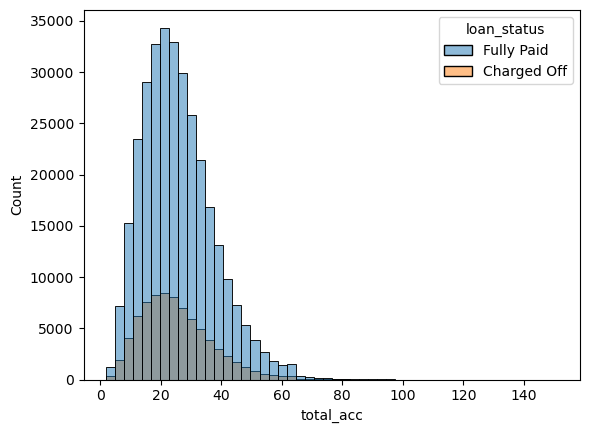

In [112]:
sns.histplot(data = df,hue = 'loan_status',x = 'total_acc',bins=50)

<Axes: xlabel='revol_util', ylabel='Count'>

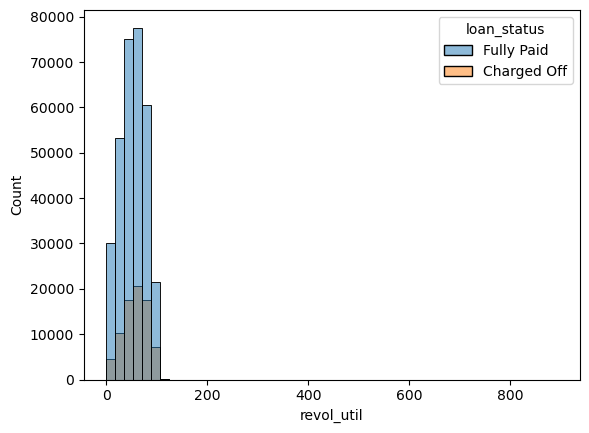

In [113]:
sns.histplot(data = df,hue = 'loan_status',x = 'revol_util',bins=50)

<Axes: xlabel='revol_util', ylabel='Count'>

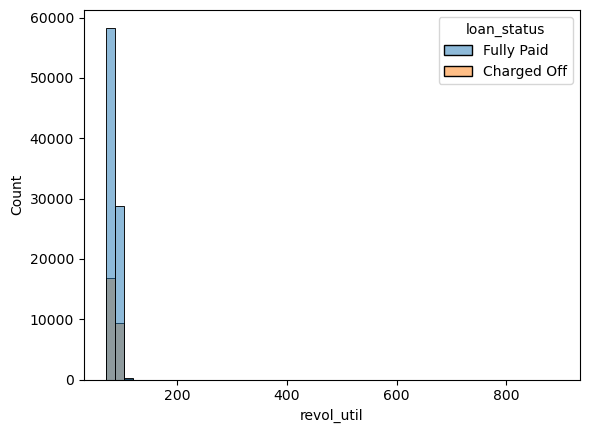

In [115]:
sns.histplot(data = df[df['revol_util']>70],x='revol_util',bins=50, hue='loan_status')

<Axes: xlabel='pub_rec', ylabel='count'>

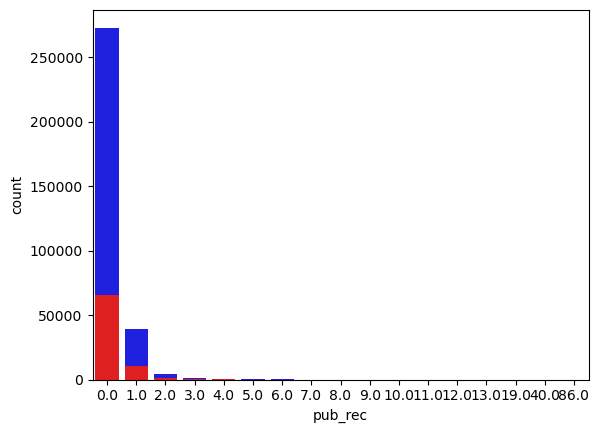

In [122]:
sns.countplot(x = "pub_rec", data = df[df['loan_status']=="Fully Paid"],color = "blue")
sns.countplot(x = "pub_rec", data = df[df['loan_status']=="Charged Off"],color="red")

<Axes: xlabel='initial_list_status', ylabel='count'>

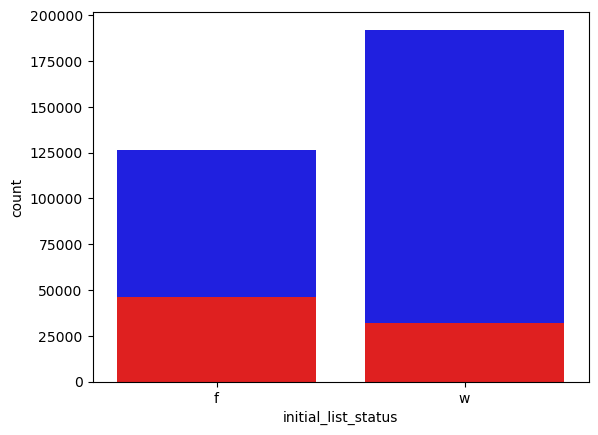

In [124]:
sns.countplot(x='initial_list_status',color = "blue",data =df[df['loan_status']=="Fully Paid"])
sns.countplot(x='initial_list_status',color = "red",data =df[df['loan_status']=="Charged Off"])


In [128]:
#checking proportion of missing values in each column
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing/df.shape[0])*100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")
    


'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [129]:
df.emp_title.nunique()
#Since there are too many unique values trying to convert this into a
#dummy variable will be difficult

173105

In [130]:
df.drop("emp_title", axis=1, inplace=True)

In [131]:
df.emp_length.nunique()

11

In [135]:
#checking loan statuses for employees with different years of experience
for year in df.emp_length.unique():
    print(f"{year} years in this position")
    print(f"{df[df['emp_length']==year].loan_status.value_counts(normalize = True)}")
    print("=======================================")
          

10+ years years in this position
loan_status
Fully Paid     0.815814
Charged Off    0.184186
Name: proportion, dtype: float64
4 years years in this position
loan_status
Fully Paid     0.807615
Charged Off    0.192385
Name: proportion, dtype: float64
< 1 year years in this position
loan_status
Fully Paid     0.793128
Charged Off    0.206872
Name: proportion, dtype: float64
6 years years in this position
loan_status
Fully Paid     0.810806
Charged Off    0.189194
Name: proportion, dtype: float64
9 years years in this position
loan_status
Fully Paid     0.79953
Charged Off    0.20047
Name: proportion, dtype: float64
2 years years in this position
loan_status
Fully Paid     0.806738
Charged Off    0.193262
Name: proportion, dtype: float64
3 years years in this position
loan_status
Fully Paid     0.804769
Charged Off    0.195231
Name: proportion, dtype: float64
8 years years in this position
loan_status
Fully Paid     0.80024
Charged Off    0.19976
Name: proportion, dtype: float64
7 years y

In [ ]:
#charge off rates are extremely similar across all employment lengths. So we 
#are going to drop emp_lenth column

In [137]:
df.title.nunique()

48816

In [138]:
df.drop('title',axis=1, inplace=True) #because of many values in title column

In [139]:
data['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [140]:
data['mort_acc'].isna().sum()

37795

In [148]:
mort_acc_correlation = data.corr()['mort_acc'].drop('mort_acc').sort_values()

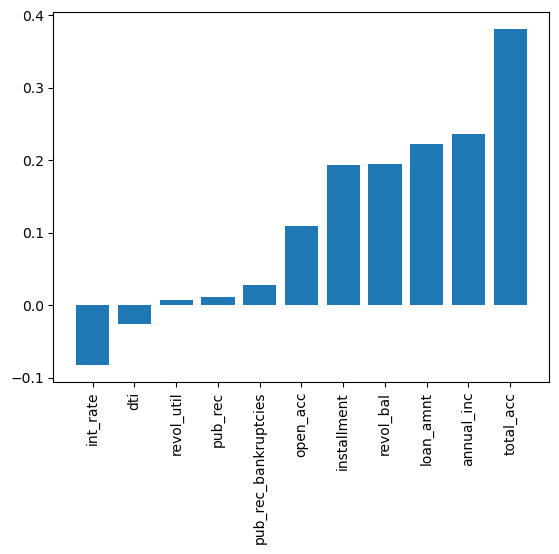

In [152]:
plt.bar(x=mort_acc_correlation.index, height=mort_acc_correlation.values )
plt.xticks(rotation=90)
plt.show()

In [154]:
total_acc_avg = data.groupby(by = 'total_acc')['mort_acc'].mean()
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [155]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [156]:
data['mort_acc'] = df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)
#as shown above mort_acc and total_acc are highly co-related therfore we can use 
#total_acc to predict mart_acc

C:\Users\sarth\AppData\Local\Temp\ipykernel_27444\1136287729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mort_acc'] = df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)


In [157]:
data['mort_acc'].isna().sum()

0

In [159]:
print([column for column in df.columns if df[column].dtype == object])

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'address']


In [161]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [163]:
term_values = {' 36 months':36, ' 60 months':60}
df['term'] = df['term'].map(term_values)

In [164]:
df['term'].unique()

array([36, 60], dtype=int64)

In [165]:
df.drop('grade', axis = 1 ,inplace = True)

In [166]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
df = pd.get_dummies(df, columns=dummies, drop_first=True)
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,10+ years,117000.0,2015-01-01,Fully Paid,26.24,1990-06-01,...,True,False,True,True,False,False,False,False,False,True
1,8000.0,36,11.99,265.68,4 years,65000.0,2015-01-01,Fully Paid,22.05,2004-07-01,...,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,506.97,< 1 year,43057.0,2015-01-01,Fully Paid,12.79,2007-08-01,...,False,False,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,6 years,54000.0,2014-11-01,Fully Paid,2.60,2006-09-01,...,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,609.33,9 years,55000.0,2013-04-01,Charged Off,33.95,1999-03-01,...,False,False,False,True,False,True,False,False,False,False


In [170]:
nonIntColumns = [column for column in df.columns if df[column].dtype == bool]
nonIntColumns

['sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'initial_list_status_w',
 'application_ty

In [171]:
bool_values = {False:0, True:1}
for x in nonIntColumns:
    df[x] = df[x].map(bool_values)

In [172]:
df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,10+ years,117000.0,2015-01-01,Fully Paid,26.24,1990-06-01,...,1,0,1,1,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,4 years,65000.0,2015-01-01,Fully Paid,22.05,2004-07-01,...,0,0,0,1,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,< 1 year,43057.0,2015-01-01,Fully Paid,12.79,2007-08-01,...,0,0,0,1,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,6 years,54000.0,2014-11-01,Fully Paid,2.60,2006-09-01,...,0,0,0,1,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,9 years,55000.0,2013-04-01,Charged Off,33.95,1999-03-01,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,5 years,64000.0,2013-03-01,Fully Paid,10.81,1991-11-01,...,0,0,1,1,0,0,0,0,0,1
396025,10000.0,60,10.99,217.38,2 years,40000.0,2015-10-01,Fully Paid,15.63,2004-11-01,...,0,0,1,1,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,5 years,110000.0,2015-02-01,Fully Paid,21.45,2006-02-01,...,0,0,0,1,0,1,0,0,0,0
396027,5000.0,36,9.99,161.32,10+ years,56500.0,2013-10-01,Fully Paid,17.56,1997-03-01,...,0,0,0,1,0,0,0,0,0,1


In [173]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df = pd.get_dummies(df, columns=['zip_code'], drop_first=True)

In [175]:
df.drop('address', axis=1, inplace=True)

In [176]:
df['earliest_cr_line'] = df.earliest_cr_line.dt.year

In [177]:
df['earliest_cr_line'].nunique()

65

In [178]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [179]:
 print(f"Data shape: {data.shape}")

# # Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# # Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(f"Data shape: {data.shape}")

Data shape: (396030, 12)
Data shape: (396029, 12)


In [187]:
w_p = df.loan_status.value_counts()[0] / df.shape[0]
w_n = df.loan_status.value_counts()[1] / df.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.8026028904702517
Weight of negative values 0.19739710952974837


In [240]:
lower, upper = remove_outlier(df['annual_inc'])
df = df[(df['annual_inc']>= lower) & (df['annual_inc']<= upper)]
lower, upper = remove_outlier(df['dti'])
df = df[(df['dti']>= lower) & (df['dti']<= upper)]
lower, upper = remove_outlier(df['open_acc'])
df = df[(df['open_acc']>= lower) & (df['open_acc']<= upper)]
lower, upper = remove_outlier(df['total_acc'])
df = df[(df['total_acc']>= lower) & (df['total_acc']<= upper)]
lower, upper = remove_outlier(df['revol_util'])
df = df[(df['revol_util']>= lower) & (df['revol_util']<= upper)]


In [241]:
y = df['loan_status']
X = df.drop("loan_status", axis = 1)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42,stratify = y)

In [221]:
import numpy as np
def remove_outlier(data):
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 75)
    IQR = Q2-Q1
    lower = Q1-1.5*IQR
    upper = Q2+1.5*IQR
    return lower, upper

In [222]:

lower, upper = remove_outlier(X_train['annual_inc'])
X_train = X_train[(X_train['annual_inc']>= lower) & (X_train['annual_inc']<= upper)]
lower, upper = remove_outlier(X_train['dti'])
X_train = X_train[(X_train['dti']>= lower) & (X_train['dti']<= upper)]
lower, upper = remove_outlier(X_train['open_acc'])
X_train = X_train[(X_train['open_acc']>= lower) & (X_train['open_acc']<= upper)]
lower, upper = remove_outlier(X_train['total_acc'])
X_train = X_train[(X_train['total_acc']>= lower) & (X_train['total_acc']<= upper)]
lower, upper = remove_outlier(X_train['revol_util'])
X_train = X_train[(X_train['revol_util']>= lower) & (X_train['revol_util']<= upper)]


In [243]:
X_train.shape

(204914, 81)

In [244]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
emp_length         object
                   ...   
zip_code_30723      int64
zip_code_48052      int64
zip_code_70466      int64
zip_code_86630      int64
zip_code_93700      int64
Length: 81, dtype: object

In [245]:
for column in X_train.columns:
    if X_train[column].dtype == bool:
        X_train[column] = X_train[column].map(bool_values)

In [246]:
for column in X_test.columns:
    if X_test[column].dtype == bool:
        X_test[column] = X_test[column].map(bool_values)

In [247]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
emp_length         object
                   ...   
zip_code_30723      int64
zip_code_48052      int64
zip_code_70466      int64
zip_code_86630      int64
zip_code_93700      int64
Length: 81, dtype: object

In [248]:
X_train.drop('emp_length', axis=1, inplace=True)

In [249]:
X_train.drop('issue_d',axis=1, inplace = True)

In [250]:
X_test.drop('emp_length', axis=1, inplace=True)
X_test.drop('issue_d', axis=1, inplace=True)

In [251]:
for column in X_train.columns:
    if X_train[column].dtype != int:
        print(column)
        print(X_train[column].dtype)

loan_amnt
float64
term
int64
int_rate
float64
installment
float64
annual_inc
float64
dti
float64
open_acc
float64
pub_rec
float64
revol_bal
float64
revol_util
float64
total_acc
float64
mort_acc
float64
pub_rec_bankruptcies
float64
sub_grade_A2
int64
sub_grade_A3
int64
sub_grade_A4
int64
sub_grade_A5
int64
sub_grade_B1
int64
sub_grade_B2
int64
sub_grade_B3
int64
sub_grade_B4
int64
sub_grade_B5
int64
sub_grade_C1
int64
sub_grade_C2
int64
sub_grade_C3
int64
sub_grade_C4
int64
sub_grade_C5
int64
sub_grade_D1
int64
sub_grade_D2
int64
sub_grade_D3
int64
sub_grade_D4
int64
sub_grade_D5
int64
sub_grade_E1
int64
sub_grade_E2
int64
sub_grade_E3
int64
sub_grade_E4
int64
sub_grade_E5
int64
sub_grade_F1
int64
sub_grade_F2
int64
sub_grade_F3
int64
sub_grade_F4
int64
sub_grade_F5
int64
sub_grade_G1
int64
sub_grade_G2
int64
sub_grade_G3
int64
sub_grade_G4
int64
sub_grade_G5
int64
verification_status_Source Verified
int64
verification_status_Verified
int64
purpose_credit_card
int64
purpose_debt_consoli

In [252]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [253]:

loan_status_mp = {"Fully Paid":0, "Charged Off":1}
y_train = y_train.map(loan_status_mp)
y_train

302178    0
215801    0
181319    0
154552    0
48612     1
         ..
170791    0
15252     0
111761    0
289276    0
322688    0
Name: loan_status, Length: 204914, dtype: int64

In [254]:
loan_status_mp = {"Fully Paid":0, "Charged Off":1}
y_test = y_test.map(loan_status_mp)
y_test

140943    0
315040    1
377270    0
122662    0
51574     0
         ..
138802    0
69315     0
66656     0
353289    0
67366     1
Name: loan_status, Length: 100928, dtype: int64

In [255]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)



NameError: name 'print_score' is not defined

In [256]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [257]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg  weighted avg
precision       0.999988      1.000000   0.99999       0.999994       0.99999
recall          1.000000      0.999951   0.99999       0.999976       0.99999
f1-score        0.999994      0.999976   0.99999       0.999985       0.99999
support    163944.000000  40970.000000   0.99999  204914.000000  204914.00000
_______________________________________________
Confusion Matrix: 
 [[163944      0]
 [     2  40968]]

Test Result:
Accuracy Score: 88.64%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.878979      0.957467  0.886384       0.918223       0.894672
recall         0.994984      0.451806  0.886384       0.723395       0.886384
f1-score       0.933391      0.613919  0.886384       0.